## HW Set 5, Problem 1

Data set #1

Tom Solomon, April 2021 (modified from curve_fit_w_contour, Marty Ligare, August 2020), slight modification KVL March 2022

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib inline

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define  functions

In [3]:
def f(x,m,b):
    '''Simple linear function with slope m and intercept b'''
    return x*m + b

def chi2(x, y, u, m, b):
    '''Chisquare as a function of data (x, y, and yerr=u), and model 
    parameters slope and intercept (m and b)'''
    return np.sum((y - f(x, m, b))**2/u**2)

### Linear fit to data for $m$ and $b$

#### Data to be fit:

In [4]:
# Or: data = np.loadtxt("file.dat")  
# Format:  [[x1,y1,u1], [x2,y2,u2], ... ]   where u1 is uncertainty in y1
data = np.array([[1, 4.67468, 0.5], [2, 2.82931, 0.4], [3, -0.53042, 0.6],
[4, -2.37786, 0.5], [5, -5.57461, 0.4], [6, -7.29526, 0.6], [7, -9.98074, 0.5],
[8, -11.9649, 0.5], [9, -14.7745, 0.6], [10, -16.711, 0.5]])

x, y, u = data.T

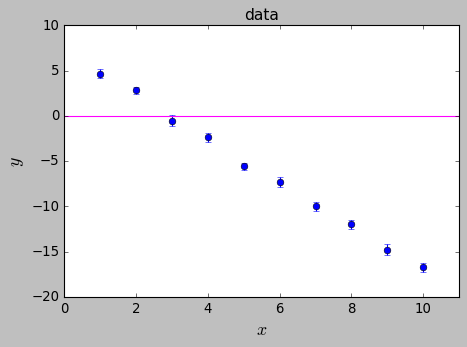

In [5]:
xc = np.linspace(0,11,201) # quasi-continuous set of x's for function plot
plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='magenta')
plt.xlim(0,11) 
plt.errorbar(x,y,yerr=u,fmt='o');

#### Perform fit

In [6]:
popt, pcov = optimize.curve_fit(f, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))
# print("reduced chi2 = chi2/(len(x)-len(popt)) =", chi2(x, y, u, *popt)/(len(x)-len(popt)))

a = chi2(x,y,u,*popt)

slope = -2.420943777933412 +/- 0.054854529605113465 

intercept = 7.1534950965529855 +/- 0.3270214153323873 

covariance matrix = 
 [[ 0.00300902 -0.0157513 ]
 [-0.0157513   0.10694301]] 

chi2 = 5.638329587568608


### So, m = -2.42 $\pm$ 0.05 
### b = 7.2 $\pm$ 0.3

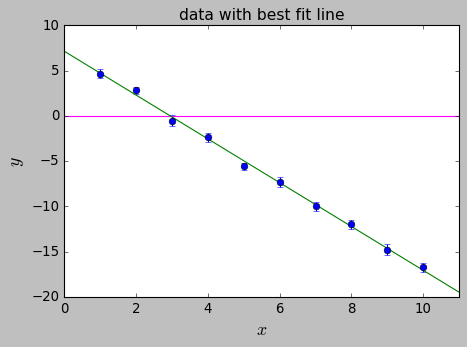

In [7]:
xc = np.linspace(0,11,201) # quasi-continuous set of x's function plot
plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='magenta')
plt.xlim(0,11)  # Pad x-range on plot
plt.errorbar(x, y, yerr=u, fmt='o');
plt.plot(xc ,f(xc, slope, intercept));

#### Residuals:

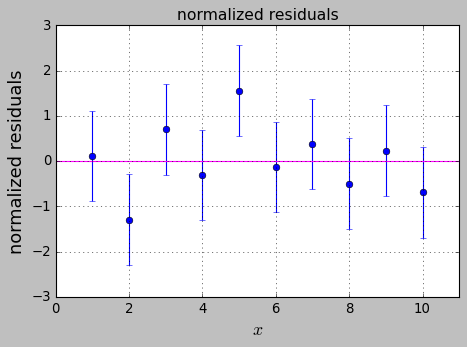

In [8]:
plt.figure()
plt.axhline(0,color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.errorbar(x,(f(x,slope,intercept)-y)/u,1,fmt='o')
plt.xlim(0,11);

### The normalized residuals look fine.  No pattern, and most -- but not all -- within range -1 to 1.

#### Make "data" for contour plot
+ Choose ranges of $m$ and $b$ for contour plot
+ Make meshgrid of slope and intercept values
+ Calculate values of $\chi^2$ at grid points

In [9]:
m = np.linspace(-3, -2.0, 201)
b = np.linspace(6.0, 8.0, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)

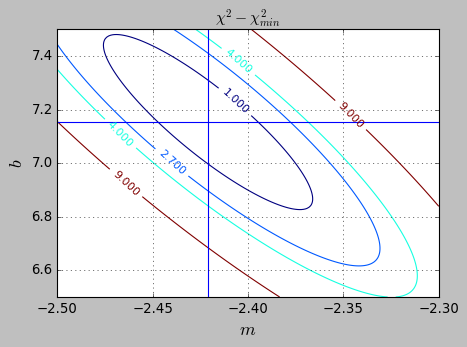

In [14]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.title("$\chi^2 - \chi^2_{min}$")
plt.grid()
plt.axhline(intercept)
#plt.axhline(intercept + alpha_b, linestyle='--')
#plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope)
#plt.axvline(slope + alpha_m,linestyle='--')
#plt.axvline(slope - alpha_m,linestyle='--')
plt.clabel(CS, inline=1, fontsize=10);

#### Zoom in an plot the contour only for 1.0

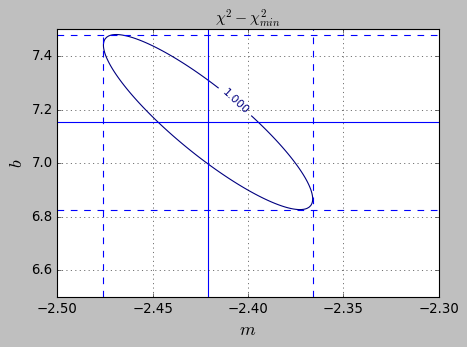

In [15]:
m = np.linspace(-2.5, -2.3, 201)
b = np.linspace(6.5, 7.5, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)
plt.figure()
CS = plt.contour(M, B, Z, levels=[1])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.title("$\chi^2 - \chi^2_{min}$")
plt.grid()
plt.axhline(intercept)
plt.axhline(intercept + alpha_b, linestyle='--')
plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope)
plt.axvline(slope + alpha_m,linestyle='--')
plt.axvline(slope - alpha_m,linestyle='--')
plt.clabel(CS, inline=1, fontsize=10);

#### So, m goes from about -2.47 to about -2.37, so $\alpha_m \approx 0.05$.  Matches up well with what the fitting program returned.

#### b goes from about 6.82 to about 7.46 or so, so $\alpha_b \approx 0.3$  Also matches up well with what the fitting program returned.

#### And $\chi^2$ ended up 5.6.  There are 10 data points, so you would expect $\chi^2$ to be something in the range of 5 to 20.  (Actually, this is too simplistic as we'll discuss in the next class.  Really, there are 8 degrees of freedom, so you really should expect $\chi^2$ to be around 8.  And then the question is whether 5.6 is close enough to 8.  It will turn out that the answer is "yes", although you will see better how to answer that more carefully in the next class.

#### So, yes, the fit seems reasonable.

#### Version information

+ %version_information is an IPython magic extension for showing version information for dependency modules in a notebook; 

+ See `https://github.com/jrjohansson/version_information`

+ `%version_information` is available on Bucknell computers on the linux network.  You can easily install it on
any computer.

In [12]:
%load_ext version_information

In [13]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1160.36.2.el7.x86_64 x86_64 with centos 7.9.2009 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Wed Mar 30 09:39:28 2022 EDT